In [1]:
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture

image (300, 400, 3)
bordes (300, 400)


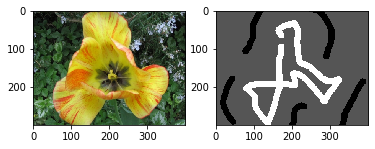

In [2]:
image = Image.open("../imagenes/images/flower.bmp")
bordes = Image.open("../imagenes/bordes_mr/flower.bmp")
image = np.array(image)
bordes = np.array(bordes)

print('image',image.shape)
print('bordes',bordes.shape)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(bordes,cmap='gray')
plt.show()

In [3]:
nr,nc,nch = image.shape
Ximg = np.reshape(image,(nr*nc,nch))
Xbor = np.reshape(bordes,(nr*nc))
print('Ximg',Ximg.shape)
print('Xbor',Xbor.shape,np.unique(Xbor,return_counts=True))

Ximg (120000, 3)
Xbor (120000,) (array([ 64, 128, 255], dtype=uint8), array([ 9943, 95241, 14816], dtype=int64))


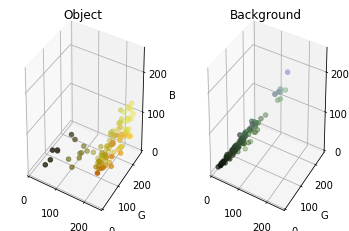

In [4]:
Xobj = Ximg[Xbor==255]
Xbck = Ximg[Xbor==64]

fig = plt.figure()

ax = fig.add_subplot(1,2,1,projection='3d')
plt.title('Object')
idx = np.random.permutation(len(Xobj))
idx = idx[:100]
R = Xobj[idx,0]
G = Xobj[idx,1]
B = Xobj[idx,2]
ax.scatter(R, G, B, c=Xobj[idx,:]/255)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

ax = fig.add_subplot(1,2,2,projection='3d')
plt.title('Background')
idx = np.random.permutation(len(Xbck))
idx = idx[:100]
R = Xbck[idx,0]
G = Xbck[idx,1]
B = Xbck[idx,2]
ax.scatter(R, G, B, c=Xbck[idx,:]/255)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show()

In [5]:
GMM_obj = GaussianMixture(n_components = 10)
GMM_obj.fit(Xobj)
print('means',GMM_obj.means_)
print('covariances',GMM_obj.covariances_)
print('weights',GMM_obj.weights_)

GMM_bck = GaussianMixture(n_components = 10)
GMM_bck.fit(Xbck)

means [[210.05198164 163.73583187  63.83943436]
 [ 80.73369237  80.92485655  38.95322142]
 [220.4898984  215.99051417  84.18811827]
 [126.53862804 124.74887528  35.97818237]
 [176.99175092 153.73172852   6.67148779]
 [214.1415659  181.68473494  33.33709424]
 [232.74810536 222.03107006  92.41155562]
 [202.96565639 119.47462122  10.2760932 ]
 [188.27367664 183.11691212  49.92209358]
 [ 51.3257754   46.7135265   33.66950948]]
covariances [[[ 1.42083860e+02  1.14443465e+02  1.70988224e+02]
  [ 1.14443465e+02  7.04962479e+02  4.03806130e+02]
  [ 1.70988224e+02  4.03806130e+02  4.18912635e+02]]

 [[ 1.86274139e+02  2.33694265e+02  3.75801134e+01]
  [ 2.33694265e+02  3.17515455e+02  6.43274719e+01]
  [ 3.75801134e+01  6.43274719e+01  3.58619922e+02]]

 [[ 1.55353915e+02  9.84770028e+01 -7.32909787e+01]
  [ 9.84770028e+01  1.45399688e+02  3.68733153e+01]
  [-7.32909787e+01  3.68733153e+01  4.20165289e+02]]

 [[ 6.67703310e+02  6.38097664e+02 -4.81382067e+01]
  [ 6.38097664e+02  6.43650033e+02 

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=10, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [6]:
print('Ximg',Ximg.shape,Ximg)
ver_obj = np.sum(GMM_obj.predict_proba(Ximg) * GMM_obj.weights_,axis=1)
ver_bck = np.sum(GMM_bck.predict_proba(Ximg) * GMM_bck.weights_,axis=1) 
print('ver_obj',len(ver_obj),ver_obj)
print('ver_bck',len(ver_bck),ver_bck)

Ximg (120000, 3) [[ 79  89 101]
 [ 78  91 100]
 [ 83 101 105]
 ...
 [144 180 170]
 [150 183 176]
 [160 191 186]]
ver_obj 120000 [0.08345229 0.08620986 0.08938395 ... 0.12486373 0.1248648  0.12487113]
ver_bck 120000 [0.04371643 0.04374258 0.04530152 ... 0.05133857 0.06114184 0.06222766]


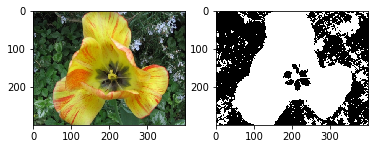

In [7]:
labels = np.zeros((len(Ximg)))
labels[ ver_obj >= ver_bck ] = 255

img_labels = np.reshape(labels,(nr,nc))
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(img_labels,cmap='gray')
plt.show()